In [325]:
import numpy as np
import matplotlib.pyplot as plt
import carbonate
from matplotlib import gridspec

%matplotlib inline

In [411]:
plt.rcParams['font.size'] = 12

In [389]:
def axis_break(fig, xsplit=None, ysplit=None):
    """
    """

    # Rows and cols
    rows, cols = 1, 1
    xscale, yscale = [0.2], [0.2]
    if xsplit is not None:
        cols = 2
        xscale = [x / sum(xsplit) for x in reversed(xsplit)]
    if ysplit is not None:
        ysplit = list(reversed(ysplit))
        rows = 2
        yscale = [y / sum(ysplit) for y in reversed(ysplit)]

    # Make subplot grid layout
    gs = gridspec.GridSpec(rows, cols, width_ratios=xsplit, height_ratios=ysplit, wspace=0.05, hspace=0.05)

    # Loop through grid
    ax = np.empty((rows, cols), dtype='object')
    for row in range(rows):
        for col in range(cols):

            # Share axes
            sharex, sharey = None, None
            if row > 0:
                sharex = ax[0, col]
            if col > 0:
                sharey = ax[row, 0]

            # Make subplot
            ax[row, col] = fig.add_subplot(gs[row, col], sharex=sharex, sharey=sharey)

    # Define break tick marker
    tick = np.array([-0.02, 0.02])

    # Horizontal axis stuff for vertical break
    if ysplit is not None:
        for col, shift, xsc in zip(range(cols), [0, 1], xscale):
            ax[0, col].plot(tick*xsc + shift, tick*yscale[0], 'k-', clip_on=False, transform=ax[0, col].transAxes)
            ax[1, col].plot(tick*xsc + shift, tick*yscale[1] + 1, 'k-', clip_on=False, transform=ax[1, col].transAxes)
            if cols == 1:
                ax[0, col].plot(tick*xsc + 1, tick*yscale[0], 'k-', clip_on=False, transform=ax[0, col].transAxes)
                ax[1, col].plot(tick*xsc + 1, tick*yscale[1] + 1, 'k-', clip_on=False, transform=ax[1, col].transAxes)
            ax[1, col].spines['top'].set_visible(False)
            ax[0, col].spines['bottom'].set_visible(False)
            for tic in ax[0, col].xaxis.get_major_ticks():
                tic.tick1On = tic.tick2On = False
                tic.label1On = tic.label2On = False

    # Vertical axis stuff for horizontal break
    if xsplit is not None:
        for row, shift, ysc in zip(range(rows), [1, 0], yscale):
            ax[row, 0].plot(tick*xscale[0] + 1, tick*ysc + shift, 'k-', clip_on=False, transform=ax[row, 0].transAxes)
            ax[row, 1].plot(tick*xscale[1], tick*ysc + shift, 'k-', clip_on=False, transform=ax[row, 1].transAxes)
            if rows == 1:
                ax[row, 0].plot(tick*xscale[0] + 1, tick*ysc, 'k-', clip_on=False, transform=ax[row, 0].transAxes)
                ax[row, 1].plot(tick*xscale[1], tick*ysc, 'k-', clip_on=False, transform=ax[row, 1].transAxes)
            ax[row, 0].spines['right'].set_visible(False)
            ax[row, 1].spines['left'].set_visible(False)
            for tic in ax[row, 1].yaxis.get_major_ticks():
                tic.tick1On = tic.tick2On = False
                tic.label1On = tic.label2On = False

    return ax, gs

In [497]:
# River data

Rivers = {
    'Amazon':      {'TA': [ 549,  246], 'DIC': [ 600,  500], 'pH': [7.2, 6.5], 'pCO2': None,          'T': None},
    'Congo':       {'TA': [ 235,   85], 'DIC': [ 258,  258], 'pH': [6.7, 5.7], 'pCO2': [ 2018,  6853], 'T': [28, 28]},
    'Changjiang':  {'TA': [1970, 1575], 'DIC': [1995, 1575], 'pH': [8.0, 7.8], 'pCO2': [  607,  1395], 'T': [ 7, 29]},
    'Maipo':       {'TA': None,         'DIC': [4100, 2400], 'pH': [7.4, 7.5], 'pCO2': [ 6700,  3500], 'T': [23, 12]},
    'Mississippi': {'TA': [2870, 2115], 'DIC': [2920, 2115], 'pH': None,       'pCO2': None,          'T': [ 8, 30]},
    'Biobio':      {'TA': None,         'DIC': [1000,  850], 'pH': [8.1, 7.7], 'pCO2': [  550,   700], 'T': [29,  9]},
    'Columbia':    {'TA': [1300,  600], 'DIC': None,         'pH': None,       'pCO2': [  176,   735], 'T': [ 3, 24]},
    'Kennebec':    {'TA': [ 510,   87], 'DIC': [ 557,  110], 'pH': [4.9, 7.0], 'pCO2': [ 1771,   203], 'T': [27,  0]},
    'Scheldt':     {'TA': [4600, 6500], 'DIC': [5000, 7000], 'pH': [7.9, 7.5], 'pCO2': [ 4000, 14000], 'T': [25,  3]},
    'Scheldt':     {'TA': [6500, 4600], 'DIC': [7000, 5000], 'pH': [7.5, 7.9], 'pCO2': [14000,  4000], 'T': [ 3, 25]},
    'Fraser':      {'TA': [1000,  500], 'DIC': [1089,  545], 'pH': [7.1, 7.9], 'pCO2': None,          'T': [2,  19]},
    'Rainfall':    {'TA': [ 420,  178], 'DIC': [ 420,  206], 'pH': None,       'pCO2': None,          'T': None},
    'Ob':          {'TA': [1218,  744], 'DIC': None,         'pH': [8.0, 7.2], 'pCO2': None,          'T': [-2, 17]},
    'Yenisey':     {'TA': [1128,  593], 'DIC': None,         'pH': [8.3, 7.7], 'pCO2': None,          'T': [ 1, 13]},
    'Mackenzie':   {'TA': [1747, 1350], 'DIC': None,         'pH': [8.2, 7.8], 'pCO2': None,          'T': [ 0, 15]},
    'Lena':        {'TA': [ 860,  651], 'DIC': None,         'pH': [8.0, 7.4], 'pCO2': None,          'T': [ 0, 11]},
    'Yukon':       {'TA': [2276, 1137], 'DIC': None,         'pH': [8.1, 7.2], 'pCO2': None,          'T': [ 0, 15]},
    'Kolyma':      {'TA': [ 536,  369], 'DIC': None,         'pH': [8.1, 7.1], 'pCO2': None,          'T': [ 0, 10]},
    'Glacial':     {'TA': [  50,   50], 'DIC': [  80,   80], 'pH': None,       'pCO2': None,          'T': None},
}

Rivers['Amazon'].update({     'marker': 'o', 'color': 'c'})
Rivers['Congo'].update({      'marker': 's', 'color': 'c'})
Rivers['Changjiang'].update({ 'marker': 'o', 'color': 'k'})
Rivers['Maipo'].update({      'marker': 's', 'color': 'k'})
Rivers['Mississippi'].update({'marker': 'D', 'color': 'k'})
Rivers['Biobio'].update({     'marker': 'o', 'color': 'gold'})
Rivers['Columbia'].update({   'marker': 's', 'color': 'gold'})
Rivers['Kennebec'].update({   'marker': 'D', 'color': 'gold'})
Rivers['Scheldt'].update({    'marker': '^', 'color': 'k'})
Rivers['Fraser'].update({     'marker': '*', 'color': 'r'})
Rivers['Rainfall'].update({   'marker': 'o', 'color': 'm'})
Rivers['Glacial'].update({    'marker': 's', 'color': 'm'})
Rivers['Ob'].update({         'marker': 'o', 'color': 'w'})
Rivers['Yenisey'].update({    'marker': 's', 'color': 'w'})
Rivers['Mackenzie'].update({  'marker': 'D', 'color': 'w'})
Rivers['Lena'].update({       'marker': '^', 'color': 'w'})
Rivers['Yukon'].update({      'marker': 'v', 'color': 'w'})
Rivers['Kolyma'].update({     'marker': '>', 'color': 'w'})

In [498]:
for river in Rivers.items():
    if river[1]['TA'] is None:
        data = carbonate.calc_carbonate(
            [np.array(river[1]['DIC']), np.array(river[1]['pCO2'])],
            0, 0, np.array(river[1]['T']), 0, 0, params=['TC', 'pCO2'],
        )
        river[1]['TA'] = list(data['TA'])
    elif river[1]['DIC'] is None:
        if river[1]['pCO2'] is None:
            pH = carbonate.FindpHOnAllScales(np.array(river[1]['pH']), np.array(river[1]['T']), 0, 0, scale='NBS')
            val = pH['total']
            key = 'pH'
        else:
            val = np.array(river[1]['pCO2'])
            key = 'pCO2'
        data = carbonate.calc_carbonate(
            [np.array(river[1]['TA']), val],
            0, 0, np.array(river[1]['T']), 0, 0, params=['TA', key],
        )
        river[1]['DIC'] = list(data['TC'])

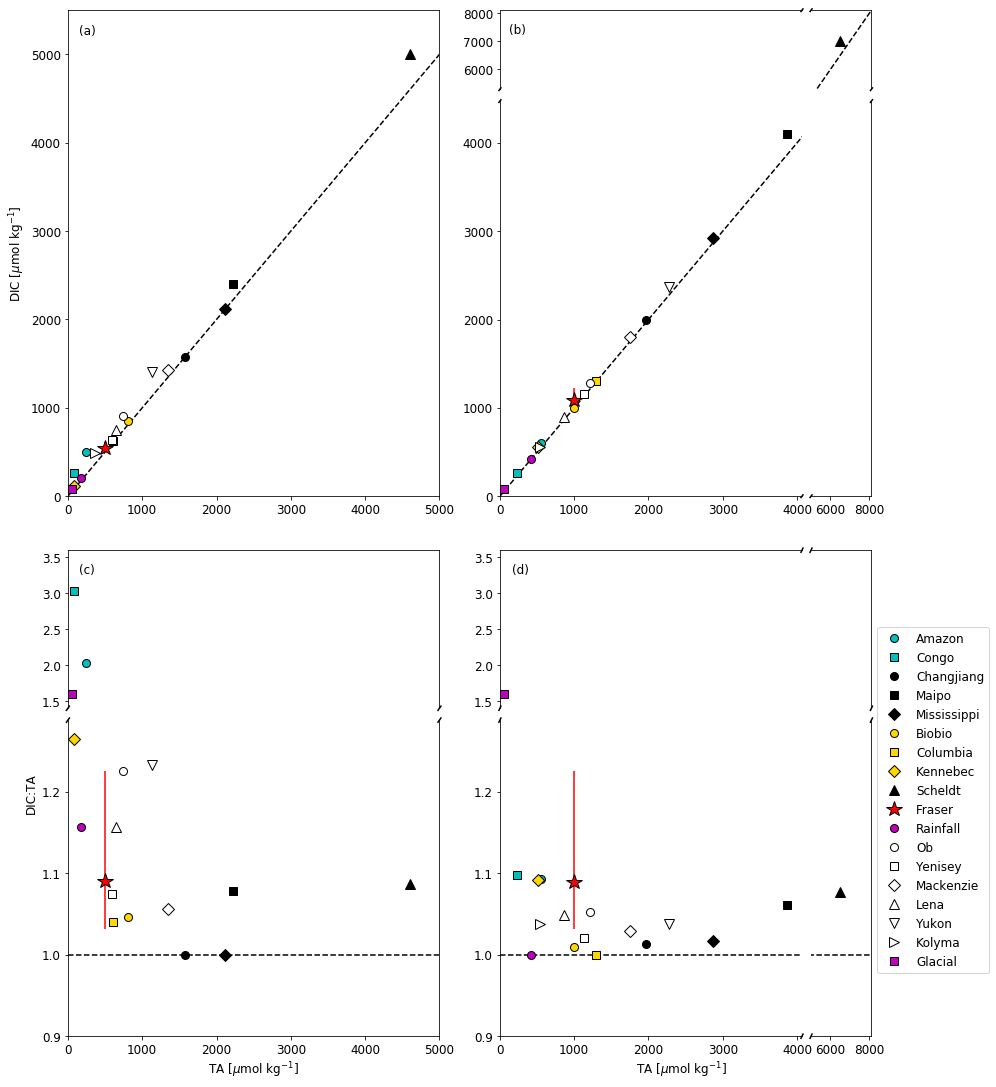

In [499]:
fig = plt.figure(figsize=(12, 15))

position = [[0, 0.5], [0.5, 0.5], [0, 0], [0.5, 0]]
xsplit = [None, [5, 1], None, [5, 1]]
ysplit = [None, [5, 1], [2, 1], [2, 1]]
ylims = [[0, 5500], [0, 5500], [0.9, 1.5], [0.9, 1.5]]
ysteps = [1000, 1000, 0.1, 0.1]
ylimsb = [None, [5300, 8100], [1.4, 3.6], [1.4, 3.6]]
ystepsb = [None, [6000, 1000], [1.5, 0.5], [1.5, 0.5]]

axs = np.empty(4, dtype='object')

for i, pos, x, y, ylim, ylimb, ystep, ystepb in zip(range(4), position, xsplit, ysplit, ylims, ylimsb, ysteps, ystepsb):
    axs[i], gs = axis_break(fig, xsplit=x, ysplit=y)
    gs.update(left=pos[0], bottom=pos[1], right=pos[0]+0.43, top=pos[1]+0.45)
    
    # Deal with axis lims
    xsc, ysc = 1, 1
    fac = 0.02
    if x is not None:
        xsc = 1 - x[1] / sum(x) - fac
        axs[i][0, 1].set_xlim([5010, 8100])
    if y is not None:
        ysc = 1 - y[1] / sum(y) - fac
        axs[i][1, 0].yaxis.set_ticks(np.arange(ylim[0], ylim[1]+1, ystep))
        axs[i][1, 0].set_ylim([ylim[0], ylim[0]+np.diff(ylim)*ysc])
        axs[i][0, 0].yaxis.set_ticks(np.arange(ystepb[0], ylimb[1]+1, ystepb[1]))
        axs[i][0, 0].set_ylim(ylimb)
    else:
        axs[i][0, 0].yaxis.set_ticks(np.arange(ylim[0], ylim[1]+1, ystep))
        axs[i][0, 0].set_ylim([ylim[0], ylim[0]+np.diff(ylim)*ysc])
    axs[i][0, 0].xaxis.set_ticks(np.arange(0, 5001, 1000))
    axs[i][0, 0].set_xlim([0, 5000*xsc])
    
axs[2][1, 0].set_xlabel('TA [$\mu$mol kg$^{-1}$]')
axs[3][1, 0].set_xlabel('TA [$\mu$mol kg$^{-1}$]', x=0.6)
axs[0][0, 0].set_ylabel('DIC [$\mu$mol kg$^{-1}$]')
axs[2][1, 0].set_ylabel('DIC:TA', y=0.77)

axs[0][0, 0].plot([0, 9000], [0, 9000], 'k--')
axs[1][1, 0].plot([0, 9000], [0, 9000], 'k--')
axs[1][0, 1].plot([0, 9000], [0, 9000], 'k--')
axs[2][1, 0].plot([0, 9000], [1, 1], 'k--')
axs[3][1, 0].plot([0, 9000], [1, 1], 'k--')
axs[3][1, 1].plot([0, 9000], [1, 1], 'k--')

axs[0][0, 0].text(0.03, 0.95, '(a)', transform=axs[0][0, 0].transAxes)
axs[1][0, 0].text(0.03, 0.70, '(b)', transform=axs[1][0, 0].transAxes)
axs[2][0, 0].text(0.03, 0.85, '(c)', transform=axs[2][0, 0].transAxes)
axs[3][0, 0].text(0.04, 0.85, '(d)', transform=axs[3][0, 0].transAxes)


for river in Rivers.items():
    size = 8
    if river[0] == 'Fraser':
        size = 16
        axs[0][0, 0].errorbar(
            river[1]['TA'][1], river[1]['DIC'][1],
            yerr=[[river[1]['DIC'][1] - river[1]['TA'][1]*1.032], [river[1]['TA'][1]*1.226 - river[1]['DIC'][1]]], color='r',
        )
        axs[1][1, 0].errorbar(
            river[1]['TA'][0], river[1]['DIC'][0],
            yerr=[[river[1]['DIC'][0] - river[1]['TA'][0]*1.032], [river[1]['TA'][0]*1.226 - river[1]['DIC'][0]]], color='r',
        )
        axs[2][1, 0].errorbar(
            river[1]['TA'][1], river[1]['DIC'][1]/river[1]['TA'][1],
            yerr=[[river[1]['DIC'][1]/river[1]['TA'][1] - 1.032], [1.226 - river[1]['DIC'][1]/river[1]['TA'][1]]], color='r',
        )
        axs[3][1, 0].errorbar(
            river[1]['TA'][0], river[1]['DIC'][0]/river[1]['TA'][0],
            yerr=[[river[1]['DIC'][0]/river[1]['TA'][0] - 1.032], [1.226 - river[1]['DIC'][0]/river[1]['TA'][0]]], color='r',
        )
        
    elif river[0] in ['Lena', 'Yukon', 'Kolyma', 'Scheldt']:
        size = 10
    axs[0][0, 0].plot(
        river[1]['TA'][1], river[1]['DIC'][1], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    axs[1][1, 0].plot(
        river[1]['TA'][0], river[1]['DIC'][0], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    axs[1][0, 1].plot(
        river[1]['TA'][0], river[1]['DIC'][0], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    
    axs[2][1, 0].plot(
        river[1]['TA'][1], river[1]['DIC'][1]/river[1]['TA'][1], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    axs[2][0, 0].plot(
        river[1]['TA'][1], river[1]['DIC'][1]/river[1]['TA'][1], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    
    axs[3][1, 0].plot(
        river[1]['TA'][0], river[1]['DIC'][0]/river[1]['TA'][0], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    axs[3][0, 0].plot(
        river[1]['TA'][0], river[1]['DIC'][0]/river[1]['TA'][0], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k',
    )
    axs[3][1, 1].plot(
        river[1]['TA'][0], river[1]['DIC'][0]/river[1]['TA'][0], 'o', marker=river[1]['marker'],
        color=river[1]['color'], markersize=size, markeredgecolor='k', label=river[0],
    )

axs[3][1, 1].legend(loc=(1.1, 0.2))
plt.show()
fig.savefig('/home/bmoorema/Desktop/NewRiverFigs/DIC_TA_world.pdf', dpi=300, bbox_inches='tight')